<a href="https://colab.research.google.com/github/shazaelmorsh/Machine-Learning-Concepts/blob/main/simple_linear_models_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Lab Setup

In [10]:
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

import matplotlib.pyplot as plt


#Loading the data

In [11]:
#load the data from text file
data = np.loadtxt("./data/data_w3_ex1.csv",delimiter=",")

x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

print("shape of x is ", x.shape, " and shape of y is ", y.shape)

shape of x is  (50, 1)  and shape of y is  (50, 1)


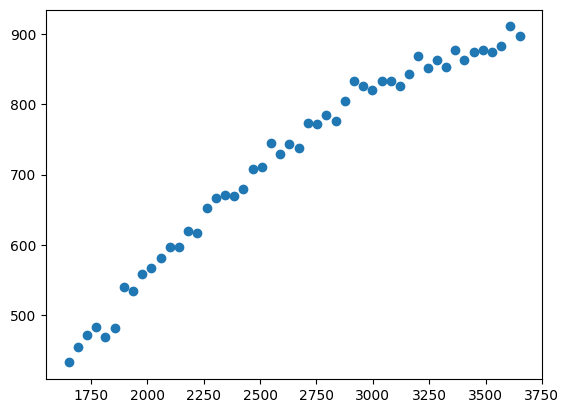

In [12]:
plt.scatter(x,y)

#Splitting the data

In [13]:
#splitting the data into training, cross validation, and test set, split
#split into 60% training, 20% cross validation, and 20% test
#we will use train_test_split from scikit
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.40,random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=1)


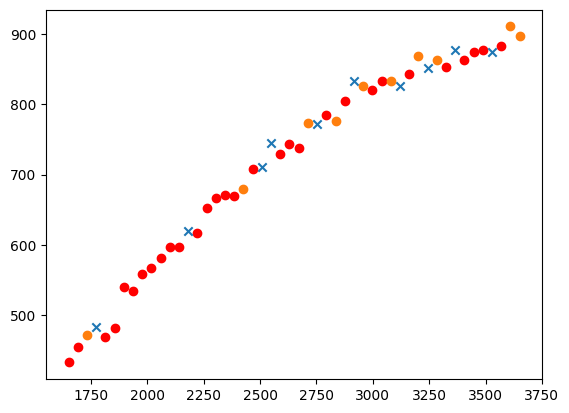

In [14]:
plt.scatter(x_train,y_train,marker="o",c="r")
plt.scatter(x_cv,y_cv,marker="x")
plt.scatter(x_test,y_test)

# Fit and Evaluate model

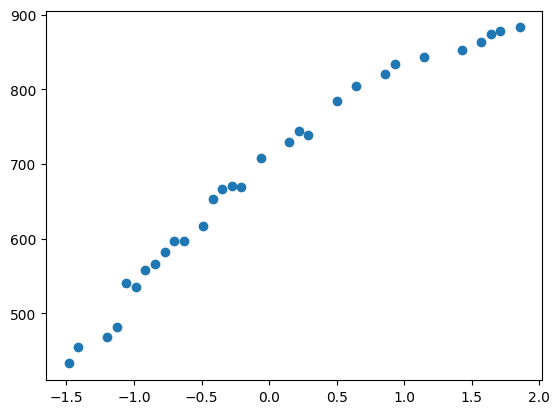

In [15]:
#reguralization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
plt.scatter(x_train_scaled,y_train)

In [27]:
#  Initialize the class
linear = LinearRegression()

# Train the model
linear.fit(x_train_scaled, y_train )

#observe the prediction
y_pred = linear.predict(x_train_scaled)
#calculating cost
cost = 0
for i in range(len(y_pred)):
  cost += (y_pred[i]-y_train[i])**2
cost = cost/(2*len(y_pred))
print(f"cost is {cost}")

# Use scikit-learn's utility function and divide by 2
# calculating cost using the library
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, y_pred) / 2}")

cost is [406.19374193]
training MSE (using sklearn function): 406.19374192533155


In [28]:
##try predicting of the cross validation set
x_cv_scaled = scaler.fit_transform(x_cv)
print(f"Mean used to scale the CV set: {scaler.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler.scale_.squeeze():.2f}")
y_pred_cv = linear.predict(x_cv_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, y_pred_cv) / 2}")


Mean used to scale the CV set: 2793.86
Standard deviation used to scale the CV set: 524.30
Cross validation MSE: 3696.781174313864


In [29]:
#create additional ploynomial features
poly = PolynomialFeatures(degree =2 , include_bias = False)
x_mapped = poly.fit_transform(x_train)
# print(x_mapped[:5])

# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(x_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]


In [30]:
#try again
#fit the model
linear = LinearRegression()
#training model
linear.fit(X_train_mapped_scaled,y_train)

y_pred = linear.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, y_pred) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = linear.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025154
Cross validation MSE: 87.6984121111191


# Introducing more polynomial features

Lowest CV MSE is found in the model with degree=4


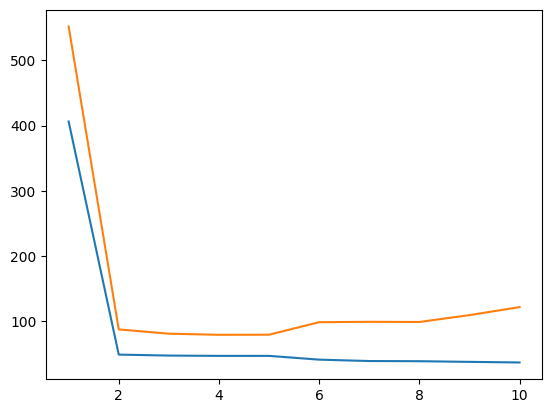

In [36]:
#we want to know which polynomial creates best performance
#we will create a loop of polynomials and check for the error in each
train_mses = []
cv_mses = []
#NOT USED
# models = []
# polys = []
# scalers = []

for degree in range(1,11):
  #add polynomial feature
  poly = PolynomialFeatures(degree , include_bias = False)
  x_mapped = poly.fit_transform(x_train)

  #scale the training set with the additional feature
  scaler_poly = StandardScaler()
  X_train_mapped_scaled = scaler_poly.fit_transform(x_mapped)

  #create and train the model
  linear = LinearRegression()
  linear.fit(X_train_mapped_scaled,y_train)

  #predict y value to use to calculate the error
  y_pred = linear.predict(X_train_mapped_scaled)

  #compute the training MSE
  train_mses.append(mean_squared_error(y_train, y_pred) / 2)

  #add poly feature and scale the cv set
  X_cv_mapped = poly.transform(x_cv)
  X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

  #compute the cross validation MSE
  y_pred = linear.predict(X_cv_mapped_scaled)
  cv_mses.append(mean_squared_error(y_cv, y_pred) / 2)

degrees = range(1,11)
plt.plot(degrees, train_mses)
plt.plot(degrees, cv_mses)

# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")